In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_atvi_weekly_det = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy_weekly_det = pd.read_csv("spy_weekly_return_volatility.csv")

In [3]:
df_atvi_weekly_det = df_atvi_weekly_det[df_atvi_weekly_det["Year"] > 2020]
df_spy_weekly_det = df_spy_weekly_det[df_spy_weekly_det["Year"] > 2020]

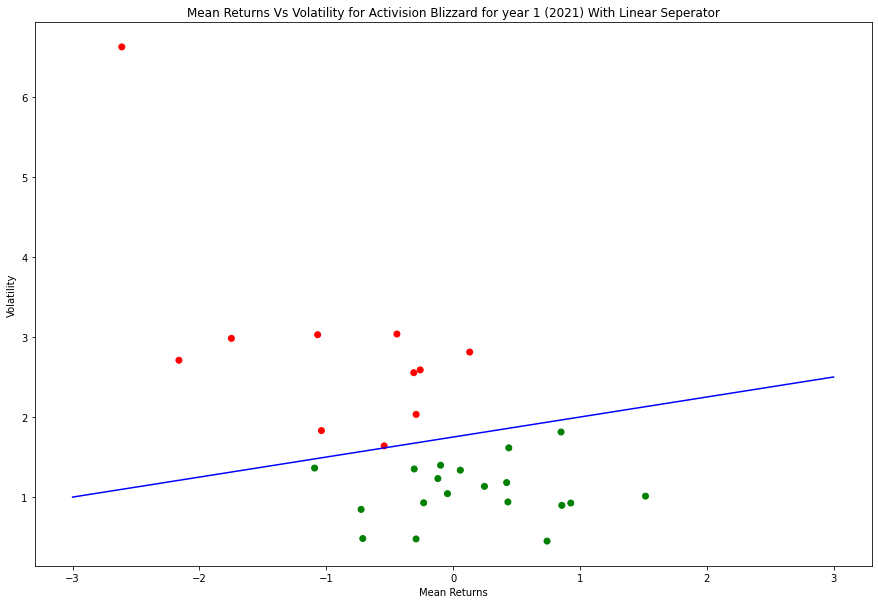

In [4]:
# Line vol = 0.25*mean + 1.75
ret = np.array(df_atvi_weekly_det["mean_return"][:52])
vol = np.array(df_atvi_weekly_det["volatility"][:52])
labels = np.array(df_atvi_weekly_det["Label"][:52])
ret_disp = []
vol_disp = []
labels_disp = []
for i in range(52): 
    vol_pred = 0.25*ret[i] + 1.75
    if vol[i] >= vol_pred and labels[i] == "red":
        ret_disp.append(ret[i])
        vol_disp.append(vol[i])
        labels_disp.append(labels[i])
    elif vol[i] < vol_pred and labels[i] == "green":
        ret_disp.append(ret[i])
        vol_disp.append(vol[i])
        labels_disp.append(labels[i])

plt.figure(figsize = (15, 10))
plt.scatter(ret_disp, vol_disp, c = labels_disp)
plt.plot([-3, 3], [1, 2.5], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Mean Returns Vs Volatility for Activision Blizzard for year 1 (2021) With Linear Seperator")
plt.show()

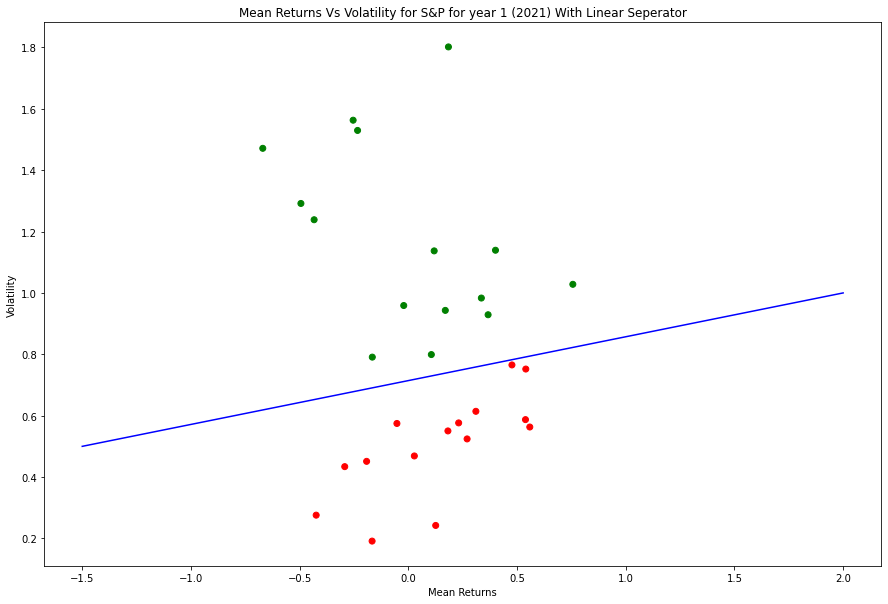

In [5]:
# vol = 0.14*mean + 0.71
ret = np.array(df_spy_weekly_det["mean_return"][:52])
vol = np.array(df_spy_weekly_det["volatility"][:52])
labels = np.array(df_spy_weekly_det["Label"][:52])

ret_disp = []
vol_disp = []
labels_disp = []
for i in range(52): 
    vol_pred = 0.14*ret[i] + 0.71
    if vol[i] >= vol_pred and labels[i] == "green":
        ret_disp.append(ret[i])
        vol_disp.append(vol[i])
        labels_disp.append(labels[i])
    elif vol[i] < vol_pred and labels[i] == "red":
        ret_disp.append(ret[i])
        vol_disp.append(vol[i])
        labels_disp.append(labels[i])

plt.figure(figsize = (15, 10))
plt.scatter(ret_disp, vol_disp, c = labels_disp)
plt.plot([-1.5, 2], [0.5, 1], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Mean Returns Vs Volatility for S&P for year 1 (2021) With Linear Seperator")
plt.show()

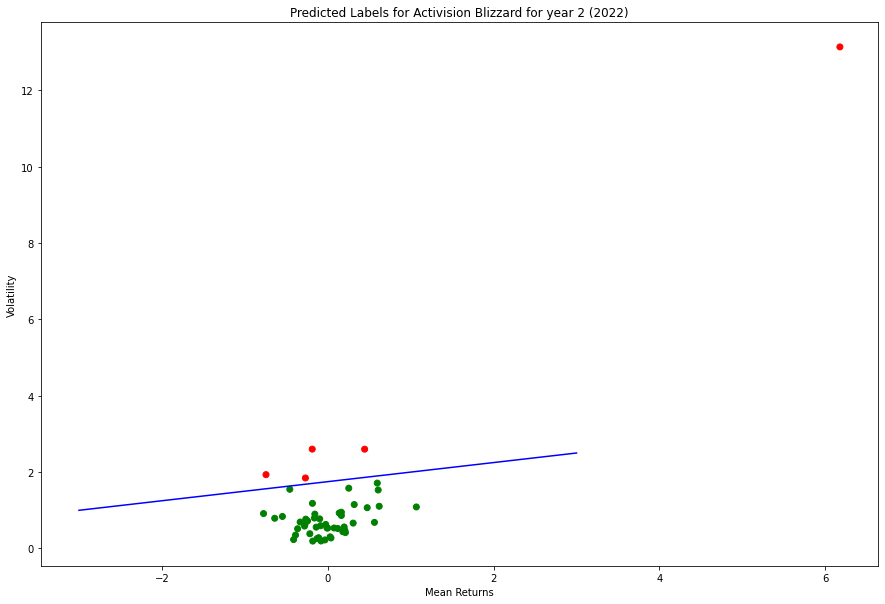

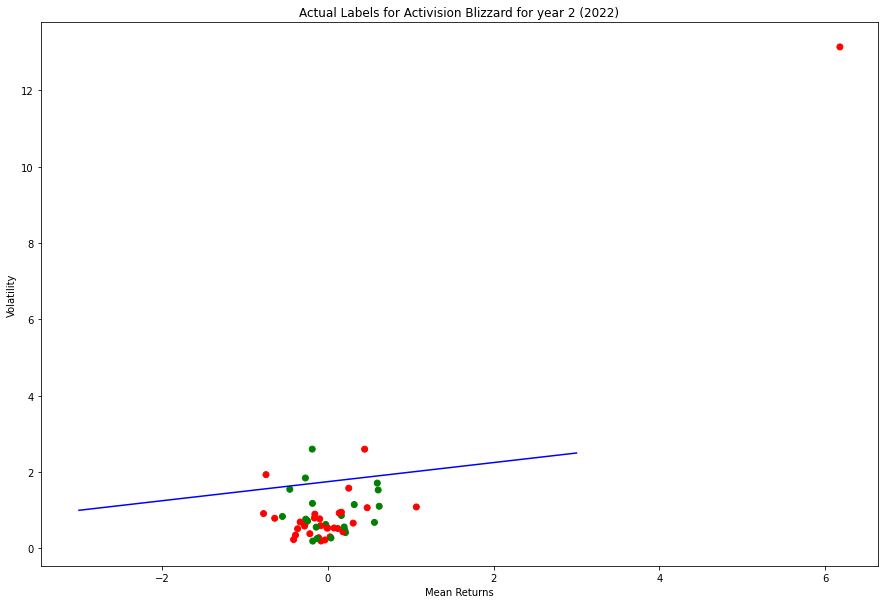

Accuracy -> 42.31 %


In [6]:
ret_2 = df_atvi_weekly_det["mean_return"][52:]
vol_cal = 0.25*ret_2 + 1.75
vol_2 = df_atvi_weekly_det["volatility"][52:]
resd = vol_2 - vol_cal
# Negative Residuals -> Green
df_atvi_weekly_det["Linear Seperator Label"][52:] = np.where(resd < 0, "green", "red")
pred_labels = df_atvi_weekly_det["Linear Seperator Label"][52:]
act_labels = df_atvi_weekly_det["Label"][52:]

plt.figure(figsize = (15, 10))
plt.scatter(ret_2, vol_2, c = pred_labels)
plt.plot([-3, 3], [1, 2.5], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Predicted Labels for Activision Blizzard for year 2 (2022)")
plt.show()

plt.figure(figsize = (15, 10))
plt.scatter(ret_2, vol_2, c = act_labels)
plt.plot([-3, 3], [1, 2.5], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Actual Labels for Activision Blizzard for year 2 (2022)")
plt.show()

print(f'Accuracy -> {round((sum(np.where(df_atvi_weekly_det["Label"][52:] == df_atvi_weekly_det["Linear Seperator Label"][52:], 1, 0))/52)*100, 2)} %')

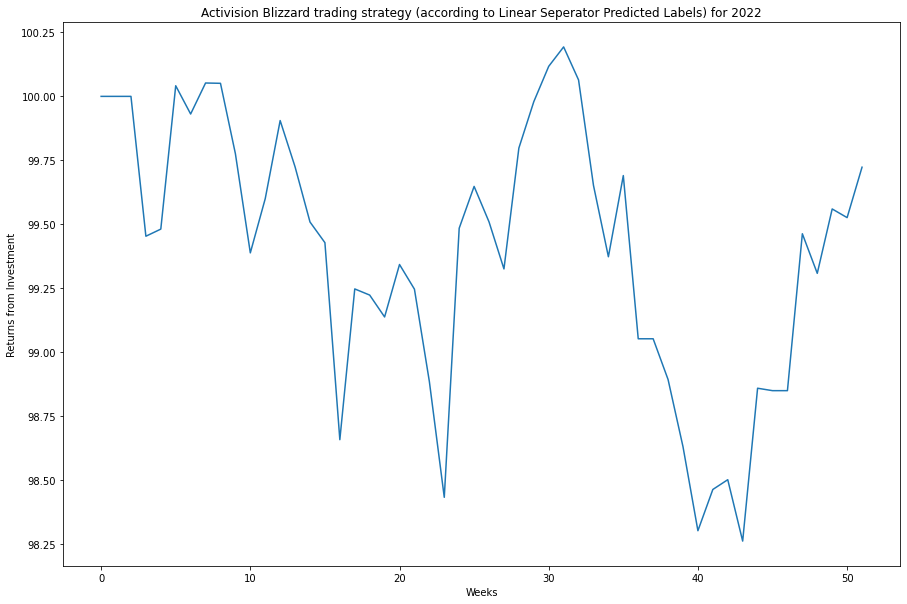

In [7]:
initial_am = 100
returns = []
ret_2 = np.array(ret_2)
labels = np.array(pred_labels)
for i in range(52):
    if labels[i] == "green":
        initial_am = initial_am*(1 + ret_2[i]/100)
    returns.append(initial_am)

plt.figure(figsize = (15, 10))
plt.plot(returns)
plt.xlabel("Weeks")
plt.ylabel("Returns from Investment")
plt.title(f"Activision Blizzard trading strategy (according to Linear Seperator Predicted Labels) for 2022")
plt.show()

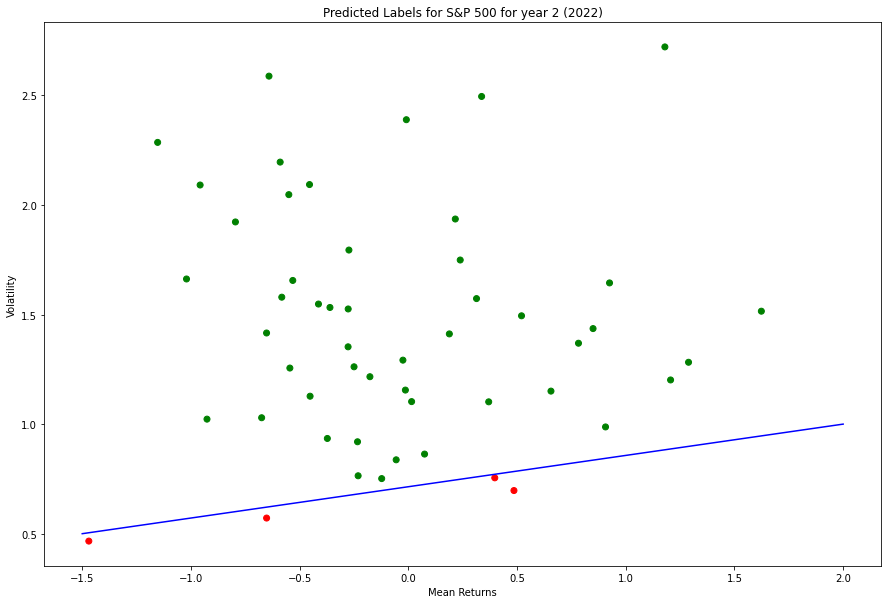

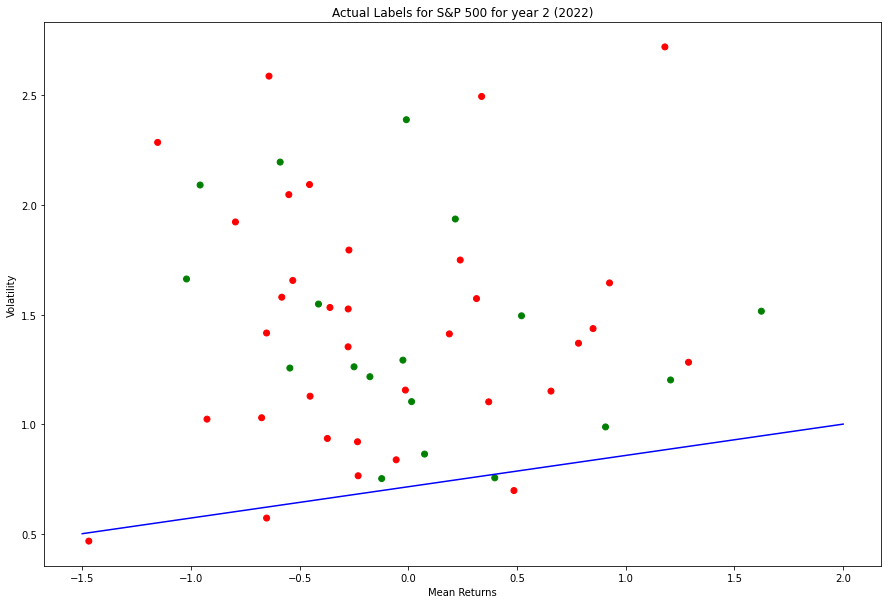

Accuracy -> 38.46 %


In [8]:
ret_2 = df_spy_weekly_det["mean_return"][52:]
vol_cal = 0.14*ret_2 + 0.71
vol_2 = df_spy_weekly_det["volatility"][52:]
resd = vol_2 - vol_cal
# Negative Residuals -> Green
df_spy_weekly_det["Linear Seperator Label"][52:] = np.where(resd < 0, "red", "green")
pred_labels = df_spy_weekly_det["Linear Seperator Label"][52:]
act_labels = df_spy_weekly_det["Label"][52:]

plt.figure(figsize = (15, 10))
plt.scatter(ret_2, vol_2, c = pred_labels)
plt.plot([-1.5, 2], [0.5, 1], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Predicted Labels for S&P 500 for year 2 (2022)")
plt.show()

plt.figure(figsize = (15, 10))
plt.scatter(ret_2, vol_2, c = act_labels)
plt.plot([-1.5, 2], [0.5, 1], color='blue')
plt.xlabel("Mean Returns")
plt.ylabel("Volatility")
plt.title(f"Actual Labels for S&P 500 for year 2 (2022)")
plt.show()

print(f'Accuracy -> {round((sum(np.where(df_spy_weekly_det["Label"][52:] == df_spy_weekly_det["Linear Seperator Label"][52:], 1, 0))/52)*100, 2)} %')

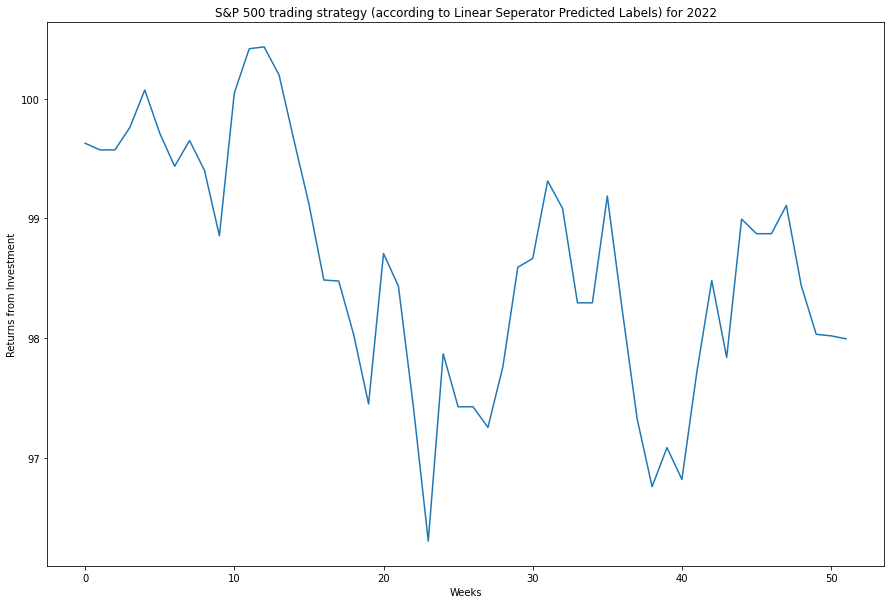

In [9]:
initial_am = 100
returns = []
ret_2 = np.array(ret_2)
labels = np.array(pred_labels)
for i in range(52):
    if labels[i] == "green":
        initial_am = initial_am*(1 + ret_2[i]/100)
    returns.append(initial_am)

plt.figure(figsize = (15, 10))
plt.plot(returns)
plt.xlabel("Weeks")
plt.ylabel("Returns from Investment")
plt.title(f"S&P 500 trading strategy (according to Linear Seperator Predicted Labels) for 2022")
plt.show()